# Import Library

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM


In [ ]:
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Import Dataset

In [ ]:
tweets_data = pd.read_csv('/content/Clean_FormulaE.csv')
tweets=tweets_data

In [ ]:
tweets.head()

,timetweet,favcount,retwcount,id,name,text_clean,text_preprocessed,polarity
0,2022-05-30 13:40:16,0,0,1.531269e+18,bubblegumpopice,b formula e nonton ga cep wkwkwk,"['b', 'formula', 'e', 'nonton', 'ga', 'cep', 'wkwkwk']",positive
1,2022-05-30 13:40:15,0,108,1.531269e+18,eddy_AS_111,b ini toh cara menjual tiket formula e xfxfxxfnmakanya habis terjualxfxfxx,"['b', 'jual', 'tiket', 'formula', 'e', 'xfxfxxfnmakanya', 'habis', 'terjualxfxfxx']",positive
2,2022-05-30 13:40:15,0,541,1.531269e+18,erwannusantara,b kemenparekraf dan kementerian bumn kalian dimana sedang berbuat apanformula e itu manfaatnya untuk rakyat dan bangsa indonxexxa,"['b', 'kemenparekraf', 'menteri', 'bumn', 'mana', 'buat', 'apanformula', 'e', 'manfaat', 'rakyat', 'bangsa', 'indonxexxa']",positive
3,2022-05-30 13:40:11,0,12,1.531269e+18,p1_eka,b tribun yg kokoh meski lokasi dekat laut bnyak angin xfxfxxnnini tribun sirkuit mandalika ya ndruuun bukan formula e xfxfxxc,"['b', 'tribun', 'yg', 'kokoh', 'lokasi', 'laut', 'bnyak', 'angin', 'xfxfxxnnini', 'tribun', 'sirkuit', 'mandalika', 'ya', 'ndruuun', 'formula', 'e', 'xfxfxxc']",positive
4,2022-05-30 13:40:03,0,58,1.531269e+18,sarisetiawaty,b formula e mengharumkan nama indonesia tanpa bumn,"['b', 'formula', 'e', 'harum', 'nama', 'indonesia', 'bumn']",positive


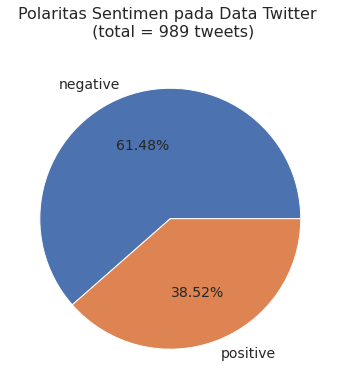

In [ ]:
import matplotlib

fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in tweets['polarity'].value_counts()]
labels = list(tweets['polarity'].value_counts().index)
explode = (0.1, 0, 0)
matplotlib.pyplot.pie(x = sizes, labels = labels, autopct = '%1.2f%%', explode = None, textprops={'fontsize': 14})
ax.set_title('Polaritas Sentimen pada Data Twitter \n (total = 989 tweets)', fontsize = 16, pad = 20)
plt.show()

In [ ]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = tweets[tweets['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_clean', 'polarity']].reset_index(drop = True)
positive_tweets.index += 1
positive_tweets[0:10]

,text_clean,polarity
1,b formula e nonton ga cep wkwkwk,positive
2,b ini toh cara menjual tiket formula e xfxfxxfnmakanya habis terjualxfxfxx,positive
3,b kemenparekraf dan kementerian bumn kalian dimana sedang berbuat apanformula e itu manfaatnya untuk rakyat dan bangsa indonxexxa,positive
4,b tribun yg kokoh meski lokasi dekat laut bnyak angin xfxfxxnnini tribun sirkuit mandalika ya ndruuun bukan formula e xfxfxxc,positive
5,b formula e mengharumkan nama indonesia tanpa bumn,positive
6,b bro nnformula e apakah bagian dari hal yg meningkatkan ekonomi khususnya bidang pariwisata jika iya saya kokxexxa,positive
7,bidha formula e jakarta medium positif generasi muda mengaktualisasikan jati dirinnkreatif xfxfxxdxfxfxxa,positive
8,bpolda metro jaya siapkan amankan ajang formula e,positive
9,b panitia formula e jakarta gandeng bmkg untuk memantau cuaca kita tak bisa mengubah cuaca tapi kita punya rencana mitigasxexxa,positive
10,bsudarsono kalau memang benar kementerian pariwisata dan ekonomi kreatif tidak memberikan dukungan formula e sebaiknya pak sandixexxa,positive


In [ ]:
pd.set_option('display.max_colwidth', 3000)
negative_tweets = tweets[tweets['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_clean', 'polarity']].reset_index(drop = True)
negative_tweets.index += 1
negative_tweets[0:20]

,text_clean,polarity
1,bmustamin setelah mobil dan logistik formula e semua sudah tiba di jakarta pertanyaan yg muncul kemudian apakah balapan formulxexxa,negative
2,b tidak sama dengan motogp mandalika panitia formula e enggan gunakan pawang hujann,negative
3,b orang bilang jangan sok jagobawa formula e seperti nya punya kemampuan,negative
4,b formula e di dki ini memang bermasalah sejak awalxfxfxx,negative
5,bnakula perusahaan tommy winata jadi sponsor utama formula e ntommy winata salah satu naga yang selama ini dibenci pendukung anixexxa,negative
6,bwaras ajang formula e tinggal hitungan hari lagi nanti akan mulai bermunculan para menteri yang pansosnnlalu teriak sampai kexexxa,negative
7,b seharusnya icw independen dan kritis terhadap robohnya atap tribun sirkuit formula e apalagi kpk juga sedang melakukan penyxexxa,negative
8,bcalon penonton harus tetap khawatir ketika bangunan tribun formula e masih dengan konstruksi bangunan yang sama maka potensi ambruk roboh atau ambrol masih tetap adannjika tak punya rasa khawatir orang gila namanya,negative
9,b pln promosiin penggunaan mobil listrikmotor listrik kompor listrik dll tapi kok gak sponsorin formula e,negative
10,bbudimab yg spanduk formula e itu nyata atau hoax,negative


In [ ]:
tweets.head()

,timetweet,favcount,retwcount,id,name,text_clean,text_preprocessed,polarity
0,2022-05-30 13:40:16,0,0,1.531269e+18,bubblegumpopice,b formula e nonton ga cep wkwkwk,"['b', 'formula', 'e', 'nonton', 'ga', 'cep', 'wkwkwk']",positive
1,2022-05-30 13:40:15,0,108,1.531269e+18,eddy_AS_111,b ini toh cara menjual tiket formula e xfxfxxfnmakanya habis terjualxfxfxx,"['b', 'jual', 'tiket', 'formula', 'e', 'xfxfxxfnmakanya', 'habis', 'terjualxfxfxx']",positive
2,2022-05-30 13:40:15,0,541,1.531269e+18,erwannusantara,b kemenparekraf dan kementerian bumn kalian dimana sedang berbuat apanformula e itu manfaatnya untuk rakyat dan bangsa indonxexxa,"['b', 'kemenparekraf', 'menteri', 'bumn', 'mana', 'buat', 'apanformula', 'e', 'manfaat', 'rakyat', 'bangsa', 'indonxexxa']",positive
3,2022-05-30 13:40:11,0,12,1.531269e+18,p1_eka,b tribun yg kokoh meski lokasi dekat laut bnyak angin xfxfxxnnini tribun sirkuit mandalika ya ndruuun bukan formula e xfxfxxc,"['b', 'tribun', 'yg', 'kokoh', 'lokasi', 'laut', 'bnyak', 'angin', 'xfxfxxnnini', 'tribun', 'sirkuit', 'mandalika', 'ya', 'ndruuun', 'formula', 'e', 'xfxfxxc']",positive
4,2022-05-30 13:40:03,0,58,1.531269e+18,sarisetiawaty,b formula e mengharumkan nama indonesia tanpa bumn,"['b', 'formula', 'e', 'harum', 'nama', 'indonesia', 'bumn']",positive


In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timetweet          989 non-null    object 
 1   favcount           989 non-null    int64  
 2   retwcount          989 non-null    int64  
 3   id                 989 non-null    float64
 4   name               989 non-null    object 
 5   text_clean         989 non-null    object 
 6   text_preprocessed  989 non-null    object 
 7   polarity           989 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 61.9+ KB


# TF - IDF


In [ ]:
# Import Library yang dibutuhkan
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer()
result = vectorizer.fit_transform(komentar) #tfidf

In [ ]:
# Menampilkan nama fitur / token dari dataset
print(vectorizer.get_feature_names_out())

['100' '2024' 'agar' 'aja' 'akan' 'anggaran' 'anies' 'baik' 'balik'
 'baswedan' 'belum' 'bikin' 'bisa' 'buang' 'buat' 'calon' 'dana' 'dananya'
 'dapat' 'dari' 'deh' 'di' 'dijadikan' 'dipake' 'dunia' 'event' 'formula'
 'gigih' 'gimana' 'gp' 'hari' 'indonesia' 'ini' 'jadi' 'jakarta' 'jangan'
 'kalau' 'kancah' 'kaya' 'ke' 'ko' 'kurang' 'lagi' 'lama' 'lambat' 'lebih'
 'lintasan' 'luar' 'maksudnya' 'mandalika' 'mau' 'maupun' 'membengkak'
 'membuktikan' 'mempromosikan' 'menarik' 'mending' 'menjadi' 'menyaksikan'
 'modal' 'moto' 'nambah' 'padahal' 'pak' 'pasti' 'pelaksanaannya'
 'pengunjung' 'penting' 'perkembangan' 'rugi' 'salah' 'sama' 'sampe'
 'sangat' 'satu' 'sebagai' 'selenggarakan' 'semoga' 'seperti' 'sepertinya'
 'sih' 'tapi' 'terpilih' 'terus' 'unjuk' 'untuk' 'ya' 'yang']


In [ ]:
# Menampilkan hasil vektor kata
print(result)

  (0, 29)	0.24162255624403872
  (0, 60)	0.24162255624403872
  (0, 78)	0.294656513566073
  (0, 71)	0.20399436469900423
  (0, 24)	0.294656513566073
  (0, 37)	0.294656513566073
  (0, 39)	0.294656513566073
  (0, 31)	0.24162255624403872
  (0, 54)	0.294656513566073
  (0, 85)	0.20399436469900423
  (0, 25)	0.24162255624403872
  (0, 75)	0.294656513566073
  (0, 22)	0.24162255624403872
  (0, 18)	0.294656513566073
  (0, 26)	0.13079783256685704
  (1, 67)	0.19171499126921343
  (1, 45)	0.19171499126921343
  (1, 14)	0.19171499126921343
  (1, 23)	0.19171499126921343
  (1, 56)	0.19171499126921343
  (1, 13)	0.38342998253842686
  (1, 3)	0.19171499126921343
  (1, 52)	0.19171499126921343
  (1, 43)	0.3144180707234469
  (1, 87)	0.3144180707234469
  :	:
  (4, 33)	0.19677551978105884
  (4, 87)	0.19677551978105884
  (4, 6)	0.16613141492266534
  (4, 26)	0.10652073171340849
  (5, 69)	0.19348881744507024
  (5, 72)	0.19348881744507024
  (5, 35)	0.19348881744507024
  (5, 86)	0.19348881744507024
  (5, 20)	0.1934888174

In [ ]:
print(f"Teks dokumen ke-{3+1}:\n{komentar[3]}")
print(f"Fitur Name ke-15: {vectorizer.get_feature_names_out()[15]}")

Teks dokumen ke-4:
formula e ini sepertinya dijadikan event untuk anies baswedan unjuk gigih membuktikan agar terpilih menjadi salah satu calon 2024
Fitur Name ke-15: calon


In [ ]:
# Menampilkan hasil TF-IDF dalam bentuk list dua dimensi
result.todense()

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.29465651, 0.        ,
         0.        , 0.        , 0.24162256, 0.        , 0.29465651,
         0.24162256, 0.13079783, 0.        , 0.        , 0.24162256,
         0.        , 0.24162256, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.29465651, 0.        , 0.29465651,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.29465651,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.24162256, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.20399436, 0

In [ ]:
# Membuat dataframe dari list dua dimensi tersebut. 
# Dilakukan transpose agar nama kolom berubah menjadi nama baris
# Nama kolom diubah menjadi urutan dokumen
df = pd.DataFrame(result.todense().T,
                  index=vectorizer.get_feature_names_out(),
                  columns=[f"D{i+1}" for i in range(len(komentar))])
df

,D1,D2,D3,D4,D5,D6
100,0.000000,0.000000,0.000000,0.000000,0.239966,0.000000
2024,0.000000,0.000000,0.000000,0.259540,0.000000,0.000000
agar,0.000000,0.000000,0.000000,0.259540,0.000000,0.000000
aja,0.000000,0.191715,0.000000,0.000000,0.000000,0.000000
akan,0.000000,0.000000,0.240530,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
terus,0.000000,0.000000,0.000000,0.000000,0.000000,0.193489
unjuk,0.000000,0.000000,0.000000,0.259540,0.000000,0.000000
untuk,0.203994,0.000000,0.166522,0.179683,0.000000,0.000000
ya,0.000000,0.000000,0.000000,0.000000,0.000000,0.193489


# TF-IDF Membandingkan antar Label (Positive, negetive)

In [ ]:
import numpy as np 
import pandas as pd 
import re  
import nltk 
nltk.download('stopwords')  
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
tweets.to_csv('tweetsfix.csv')


In [ ]:
data = pd.read_csv('tweetsfix.csv')


In [ ]:
data.head(5)

,Unnamed: 0,timetweet,favcount,retwcount,id,name,text_clean,text_preprocessed,polarity
0,0,2022-05-30 13:40:16,0,0,1.531269e+18,bubblegumpopice,b formula e nonton ga cep wkwkwk,"['b', 'formula', 'e', 'nonton', 'ga', 'cep', 'wkwkwk']",positive
1,1,2022-05-30 13:40:15,0,108,1.531269e+18,eddy_AS_111,b ini toh cara menjual tiket formula e xfxfxxfnmakanya habis terjualxfxfxx,"['b', 'jual', 'tiket', 'formula', 'e', 'xfxfxxfnmakanya', 'habis', 'terjualxfxfxx']",positive
2,2,2022-05-30 13:40:15,0,541,1.531269e+18,erwannusantara,b kemenparekraf dan kementerian bumn kalian dimana sedang berbuat apanformula e itu manfaatnya untuk rakyat dan bangsa indonxexxa,"['b', 'kemenparekraf', 'menteri', 'bumn', 'mana', 'buat', 'apanformula', 'e', 'manfaat', 'rakyat', 'bangsa', 'indonxexxa']",positive
3,3,2022-05-30 13:40:11,0,12,1.531269e+18,p1_eka,b tribun yg kokoh meski lokasi dekat laut bnyak angin xfxfxxnnini tribun sirkuit mandalika ya ndruuun bukan formula e xfxfxxc,"['b', 'tribun', 'yg', 'kokoh', 'lokasi', 'laut', 'bnyak', 'angin', 'xfxfxxnnini', 'tribun', 'sirkuit', 'mandalika', 'ya', 'ndruuun', 'formula', 'e', 'xfxfxxc']",positive
4,4,2022-05-30 13:40:03,0,58,1.531269e+18,sarisetiawaty,b formula e mengharumkan nama indonesia tanpa bumn,"['b', 'formula', 'e', 'harum', 'nama', 'indonesia', 'bumn']",positive


In [ ]:
t_1 = data[data['polarity']=='positive']
t_2 = data[data['polarity']=='negative']
tweets = pd.concat([t_1, t_2])

In [ ]:
# Cek attribut dataset
display(tweets.columns)

# Cek jumlah baris dan kolom dataset
display(tweets.shape)

Index(['Unnamed: 0', 'timetweet', 'favcount', 'retwcount', 'id', 'name',
       'text_clean', 'text_preprocessed', 'polarity'],
      dtype='object')

(989, 9)

# Explorasi Data

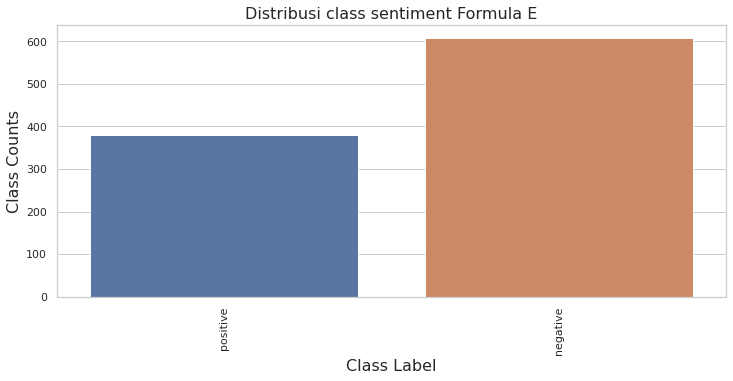

In [ ]:
# Cek jumlah review positive dan negative
plt.figure(figsize=(12,5))
sns.countplot(x='polarity', data=tweets)
plt.title('Distribusi class sentiment Formula E', fontsize=16)
plt.ylabel('Class Counts', fontsize=16)
plt.xlabel('Class Label', fontsize=16)
plt.xticks(rotation='vertical');

# Pemrosesan Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

X = tweets.iloc[:, 6].values  
le = LabelEncoder()
le.fit(["positive", "negative"])

print(list(le.classes_))
y = le.transform(tweets.iloc[:, 8].values)

print(X.shape)
print(X[0])
print(y.shape)
print(y[0])

['negative', 'positive']
(989,)
b formula e nonton ga cep wkwkwk
(989,)
1


# Skema TF-IDF untuk Pembuatan Feature Numeric

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'),ngram_range=(1,3))
X1 = tfidfconverter.fit_transform(X).toarray()

# Membagi Data ke Training dan Test Set

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=0) #20% data testing

## Pelatihan dan Evaluasi dari Model Klasifikasi Teks

In [ ]:
import time

from sklearn.ensemble import RandomForestClassifier

text_classifier_en = RandomForestClassifier(n_estimators=100, random_state=0)
t0_en = time.time()
text_classifier_en.fit(X_train, y_train)
t1_en = time.time()

In [ ]:
predictions_en = text_classifier_en.predict(X_test)
t2_en = time.time()
time_linear_train_en = t1_en-t0_en
time_linear_predict_en = t2_en-t1_en


# results
print("Waktu Training: %fs; Waktu Prediksi: %fs" % (time_linear_train_en, time_linear_predict_en))

Waktu Training: 0.703529s; Waktu Prediksi: 0.044308s


# Evaluasi

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

print("Random Forest")
print('Accuracy  = ', round(accuracy_score(y_test, predictions_en)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, predictions_en)*100,2),'%')
print('Precision = ', round(precision_score(y_test, predictions_en)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, predictions_en)*100,2),'%')
print('ROC AUC   = ', roc_auc_score(y_test, predictions_en))
print("")

print("Random Forest")
print(confusion_matrix(y_test,predictions_en))  
print("")

print("Random Forest")
print(classification_report(y_test,predictions_en)) 

Random Forest
Accuracy  =  74.24 %
Recall    =  45.71 %
Precision =  71.11 %
F1-Score  =  55.65 %
ROC AUC   =  0.6777901785714285

Random Forest
[[115  13]
 [ 38  32]]

Random Forest
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       128
           1       0.71      0.46      0.56        70

    accuracy                           0.74       198
   macro avg       0.73      0.68      0.69       198
weighted avg       0.74      0.74      0.73       198



# Testing Prediksi

In [ ]:
# Random Forest
review = "mandalika lebih baik"

review_vector = tfidfconverter.transform([review]).toarray() # vectorizing
pred_text = text_classifier_en.predict(review_vector)
pred_text = le.inverse_transform(pred_text)
print(pred_text)

['negative']


In [ ]:
# Random Forest
review = "formula E akan sukses"

review_vector = tfidfconverter.transform([review]).toarray() # vectorizing
pred_text = text_classifier_en.predict(review_vector)
pred_text = le.inverse_transform(pred_text)
print(pred_text)

['positive']
